# Load Dataset

In [1]:
from set_math import *
from set_visualization import *
from datasets_init import *

sympy imported
pandas imported
numpy imported
scipy imported


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


statsmodels imported
statsmodels.formula imported
statasmodels.stats.api imported
matplotlib imported
pyplot imported
seaborn imported
sns.set
sns.set_style(whitegrid)
sns.set_color_codes()
type (% matplotlib inline) if necessary
type (% config InlineBackend.figure_formats = {‘png’, ‘retina’}) if necessary
train.csv good
test.csv good
you may now begin


In [2]:
% matplotlib inline
% config InlineBackend.figure_formats = {'png', 'retina'}

In [3]:
train.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


In [35]:
train[train['Weekday'].isin([6])]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,Return,Purchase
43565,25,12899,6,4.032626e+09,1,LADIESWEAR,663.0,0,1
43566,25,12899,6,8.806145e+11,1,LADIESWEAR,324.0,0,1
43567,25,12899,6,1.326142e+09,1,BOYS WEAR,4648.0,0,1
43568,25,12899,6,3.400000e+09,1,IMPULSE MERCHANDISE,100.0,0,1
43569,25,12899,6,4.741724e+09,3,SHEER HOSIERY,2700.0,0,3
43570,39,12901,6,7.874235e+09,1,DAIRY,1515.0,0,1
43571,39,12901,6,4.011000e+03,1,PRODUCE,5501.0,0,1
43572,39,12901,6,7.874220e+09,2,BAKERY,3004.0,0,2
43573,39,12901,6,2.840019e+09,1,DSD GROCERY,7902.0,0,1
43574,39,12901,6,2.840004e+09,1,IMPULSE MERCHANDISE,807.0,0,1


* * * *
* * * *
* * * *

# 요일 전처리

In [4]:
# 요일 numerical encoding

wd = {
    "Monday": 0,
    "Tuesday": 1,
    "Wednesday": 2,
    "Thursday": 3, 
    "Friday": 4,
    "Saturday": 5,
    "Sunday": 6,
}

train["Weekday"] = train["Weekday"].apply(lambda x: wd[x])

# 각 Feature 설명 및 수치

- TripType = 타겟
- VisitNumber = ID (고객에 대한 고유한 ID)
- Weekday = 요일
- UPC = 구매한 아이템에 대한 고유 바코드
- ScanCount = UPC의 구매 수량 (음수일 때는 반품수량)
- DepartmentDescription = 대분류
- FinelineNumber = 소분류

In [5]:
print(train.info(), '\n')
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647054 entries, 0 to 647053
Data columns (total 7 columns):
TripType                 647054 non-null int64
VisitNumber              647054 non-null int64
Weekday                  647054 non-null int64
Upc                      642925 non-null float64
ScanCount                647054 non-null int64
DepartmentDescription    645693 non-null object
FinelineNumber           642925 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 34.6+ MB
None 



,TripType,VisitNumber,Weekday,Upc,ScanCount,FinelineNumber
count,647054.000000,647054.000000,647054.000000,6.429250e+05,647054.000000,642925.000000
mean,58.584511,96167.640078,3.427787,3.060698e+10,1.108878,3726.884567
std,157.635533,55545.485154,2.073297,9.120134e+10,0.700776,2780.966158
min,3.000000,5.000000,0.000000,8.340000e+02,-12.000000,0.000000
25%,27.000000,49268.000000,2.000000,3.400001e+09,1.000000,1404.000000
50%,39.000000,97074.000000,4.000000,7.050103e+09,1.000000,3352.000000
75%,40.000000,144316.000000,5.000000,3.006531e+10,1.000000,5501.000000
max,999.000000,191347.000000,6.000000,9.789707e+11,71.000000,9998.000000


In [6]:
print("rows :", train.shape[0],'\n' + "columns :", train.shape[1])
print("#n of VisitNumber :", train.VisitNumber.nunique(), '\n')
print("-- Unique Values --")
for i in train:
    print( i, ":", train[i].nunique())

rows : 647054 
columns : 7
#n of VisitNumber : 95674 

-- Unique Values --
TripType : 38
VisitNumber : 95674
Weekday : 7
Upc : 97714
ScanCount : 39
DepartmentDescription : 68
FinelineNumber : 5195


### 0. Overall visualization

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


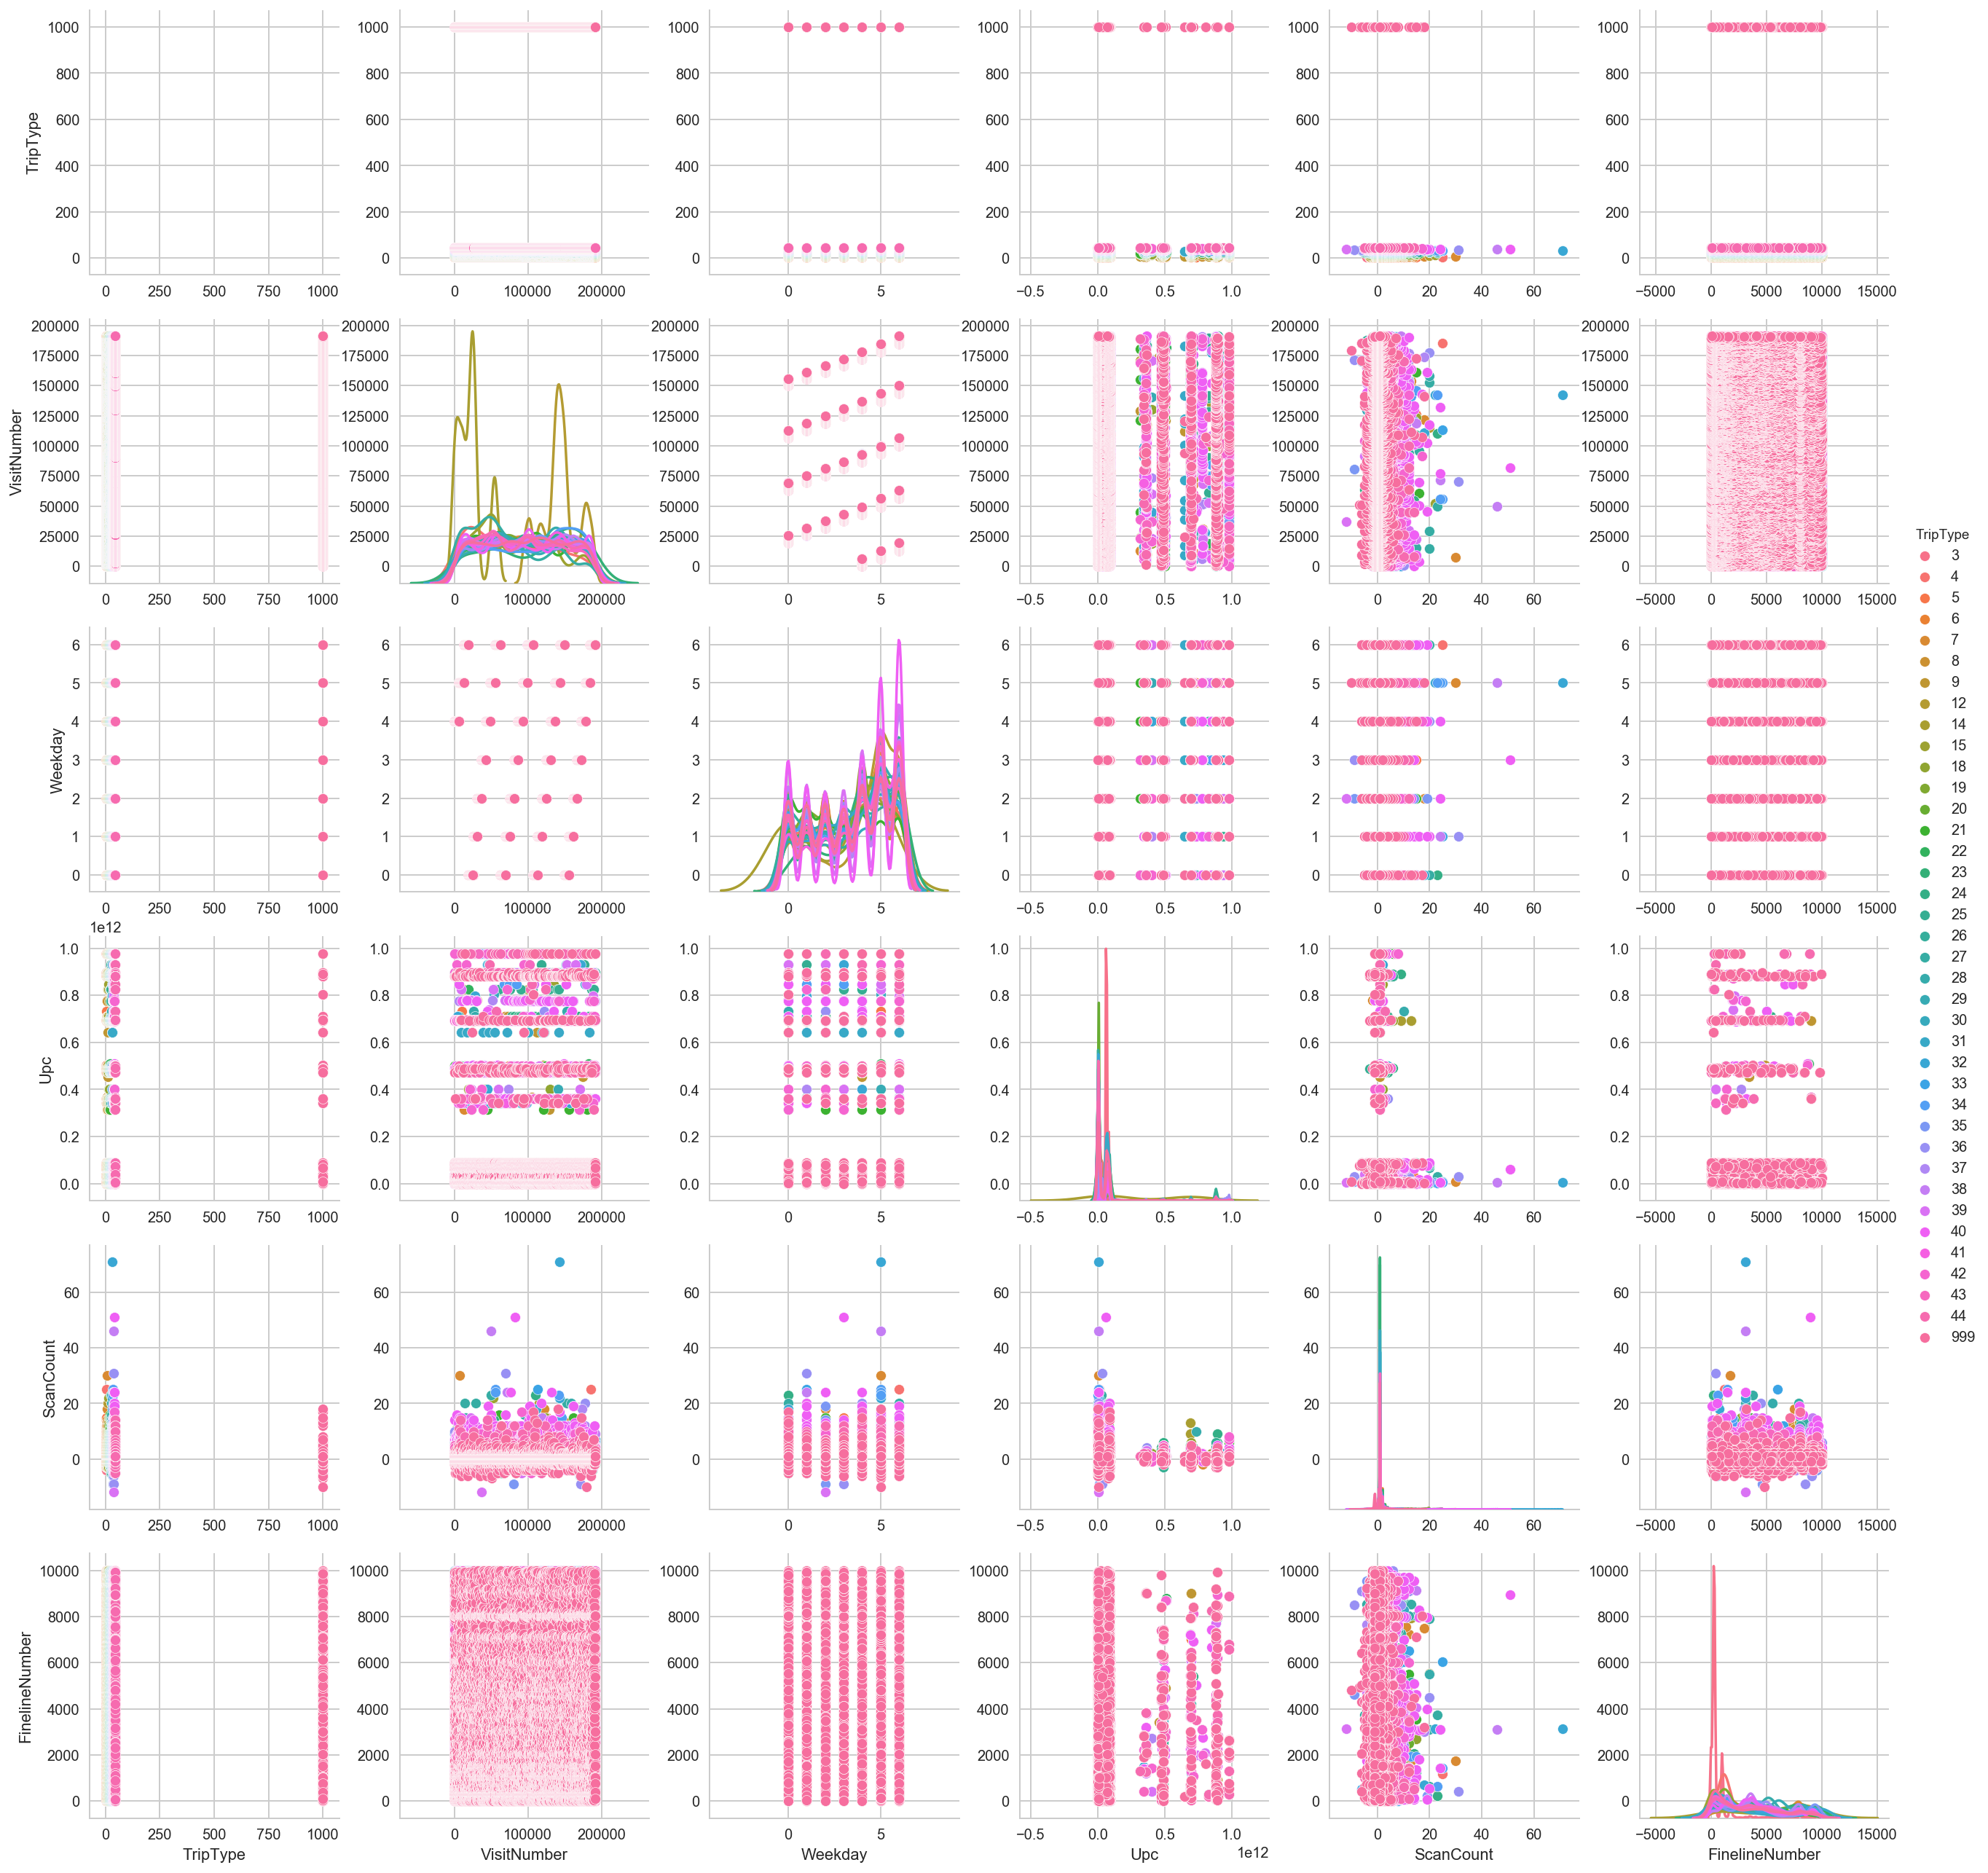

In [7]:
sns.pairplot(train, hue="TripType", size=3, diag_kind="kde")

### 1. TripType

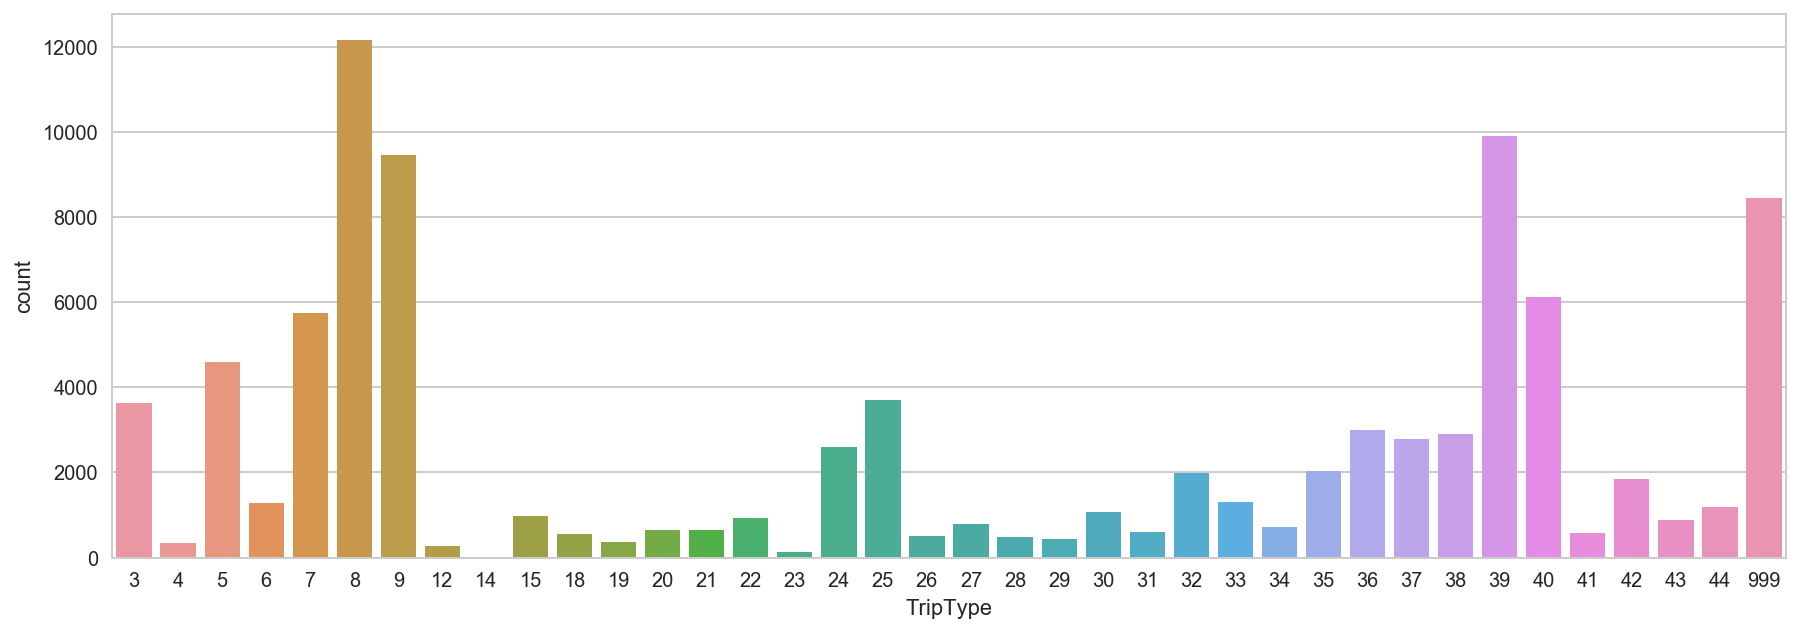

In [8]:
tmp = train[['TripType', 'VisitNumber']].groupby(['VisitNumber']).mean()

plt.figure(figsize=(15, 5))
sns.countplot(tmp['TripType'])
plt.show()

### 2. Weekday

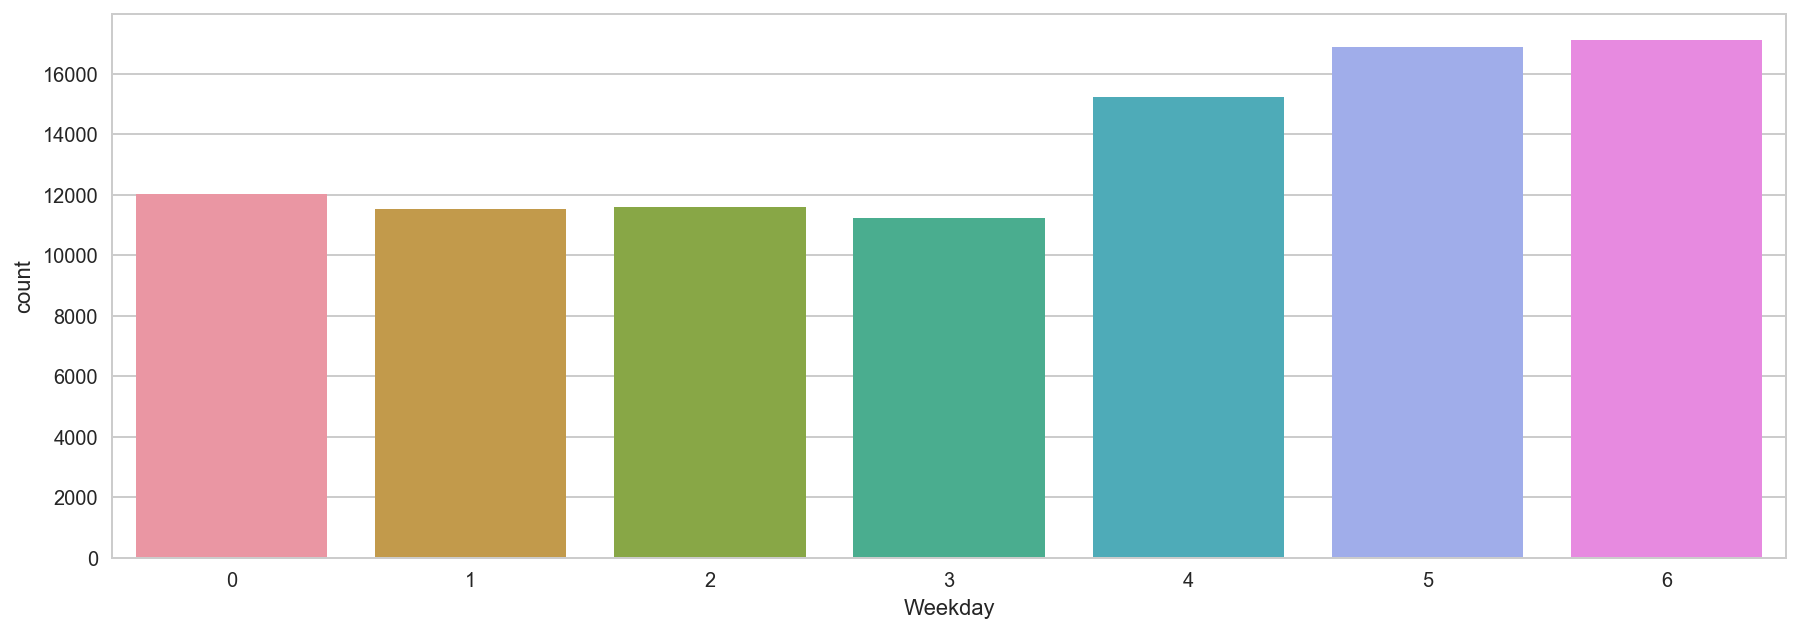

In [9]:
tmp2 = train[['Weekday', 'VisitNumber']].groupby(['VisitNumber']).mean()

plt.figure(figsize=(15, 5))
sns.countplot(tmp2['Weekday'])
plt.show()

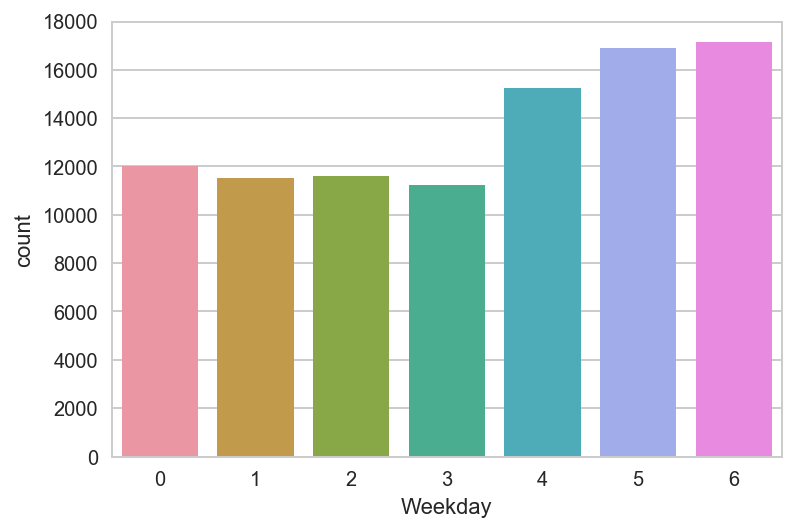

In [10]:
tmp2 = train[['Weekday', 'VisitNumber']].groupby(['VisitNumber']).mean()
sns.countplot(tmp2['Weekday'])

### ScanCount 전처리

In [11]:
train['Return'] = train['ScanCount'].apply(lambda x: x if x < 0 else 0)
train['Return'] = train['Return'].apply(abs)
train['Purchase'] = train['ScanCount'].apply(lambda x: x if x > 0 else 0)

In [12]:
ScanCount_df = train[['Purchase', 'Return', 'VisitNumber']].groupby(['VisitNumber']).sum()
ScanCount_df

,Purchase,Return
VisitNumber,,
5,0,1
7,2,0
8,30,2
9,3,0
10,3,0
11,4,0
12,7,0
15,9,0
17,4,0


In [13]:
ScanCount_df.describe()

,Purchase,Return
count,95674.000000,95674.000000
mean,7.676547,0.177081
std,10.234712,0.701180
min,0.000000,0.000000
25%,2.000000,0.000000
50%,4.000000,0.000000
75%,9.000000,0.000000
max,313.000000,52.000000


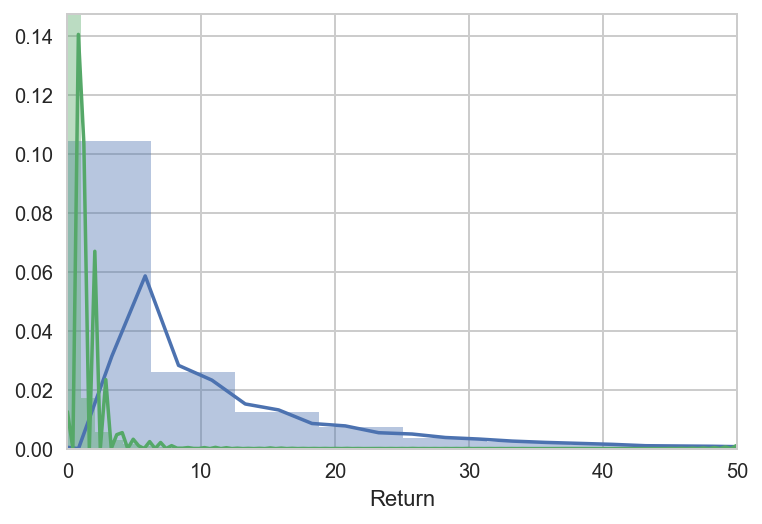

In [14]:
sns.distplot(ScanCount_df['Purchase'])
sns.distplot(ScanCount_df['Return'])
plt.xlim(0, 50)
plt.xticks
plt.show()

### 의문점

- ScanCount : 반품을 고려해야 하는가? 구매에 대한 분석이라면 ... 반품 성향까지는 고려하지 않아도 될 수도
- 결측치 : `Upc`, `DepartmentDescription`, `FinelineNumber` 각 1% 미만

In [15]:
# # ScanCount 반품 -> 0
# # NaN값 드랍
# train['ScanCount'] = train['ScanCount'].apply(lambda x: 0 if x < 0 else x)
# train.dropna(how='any', inplace=True)
# train.info()

* * * *
* * * *
* * * *

# 각 VisitNumber별 Department 출현 빈도

In [16]:
gb1 = train.groupby('VisitNumber')['DepartmentDescription'].value_counts()

# 각 TripType 별 DepartmentDescription 빈도

In [17]:
gb2 = train.groupby('TripType')['DepartmentDescription'].value_counts()

In [18]:
gb2[3].head()

DepartmentDescription
FINANCIAL SERVICES       5369
IMPULSE MERCHANDISE       804
LARGE HOUSEHOLD GOODS      76
DSD GROCERY                59
PHARMACY OTC               45
Name: DepartmentDescription, dtype: int64

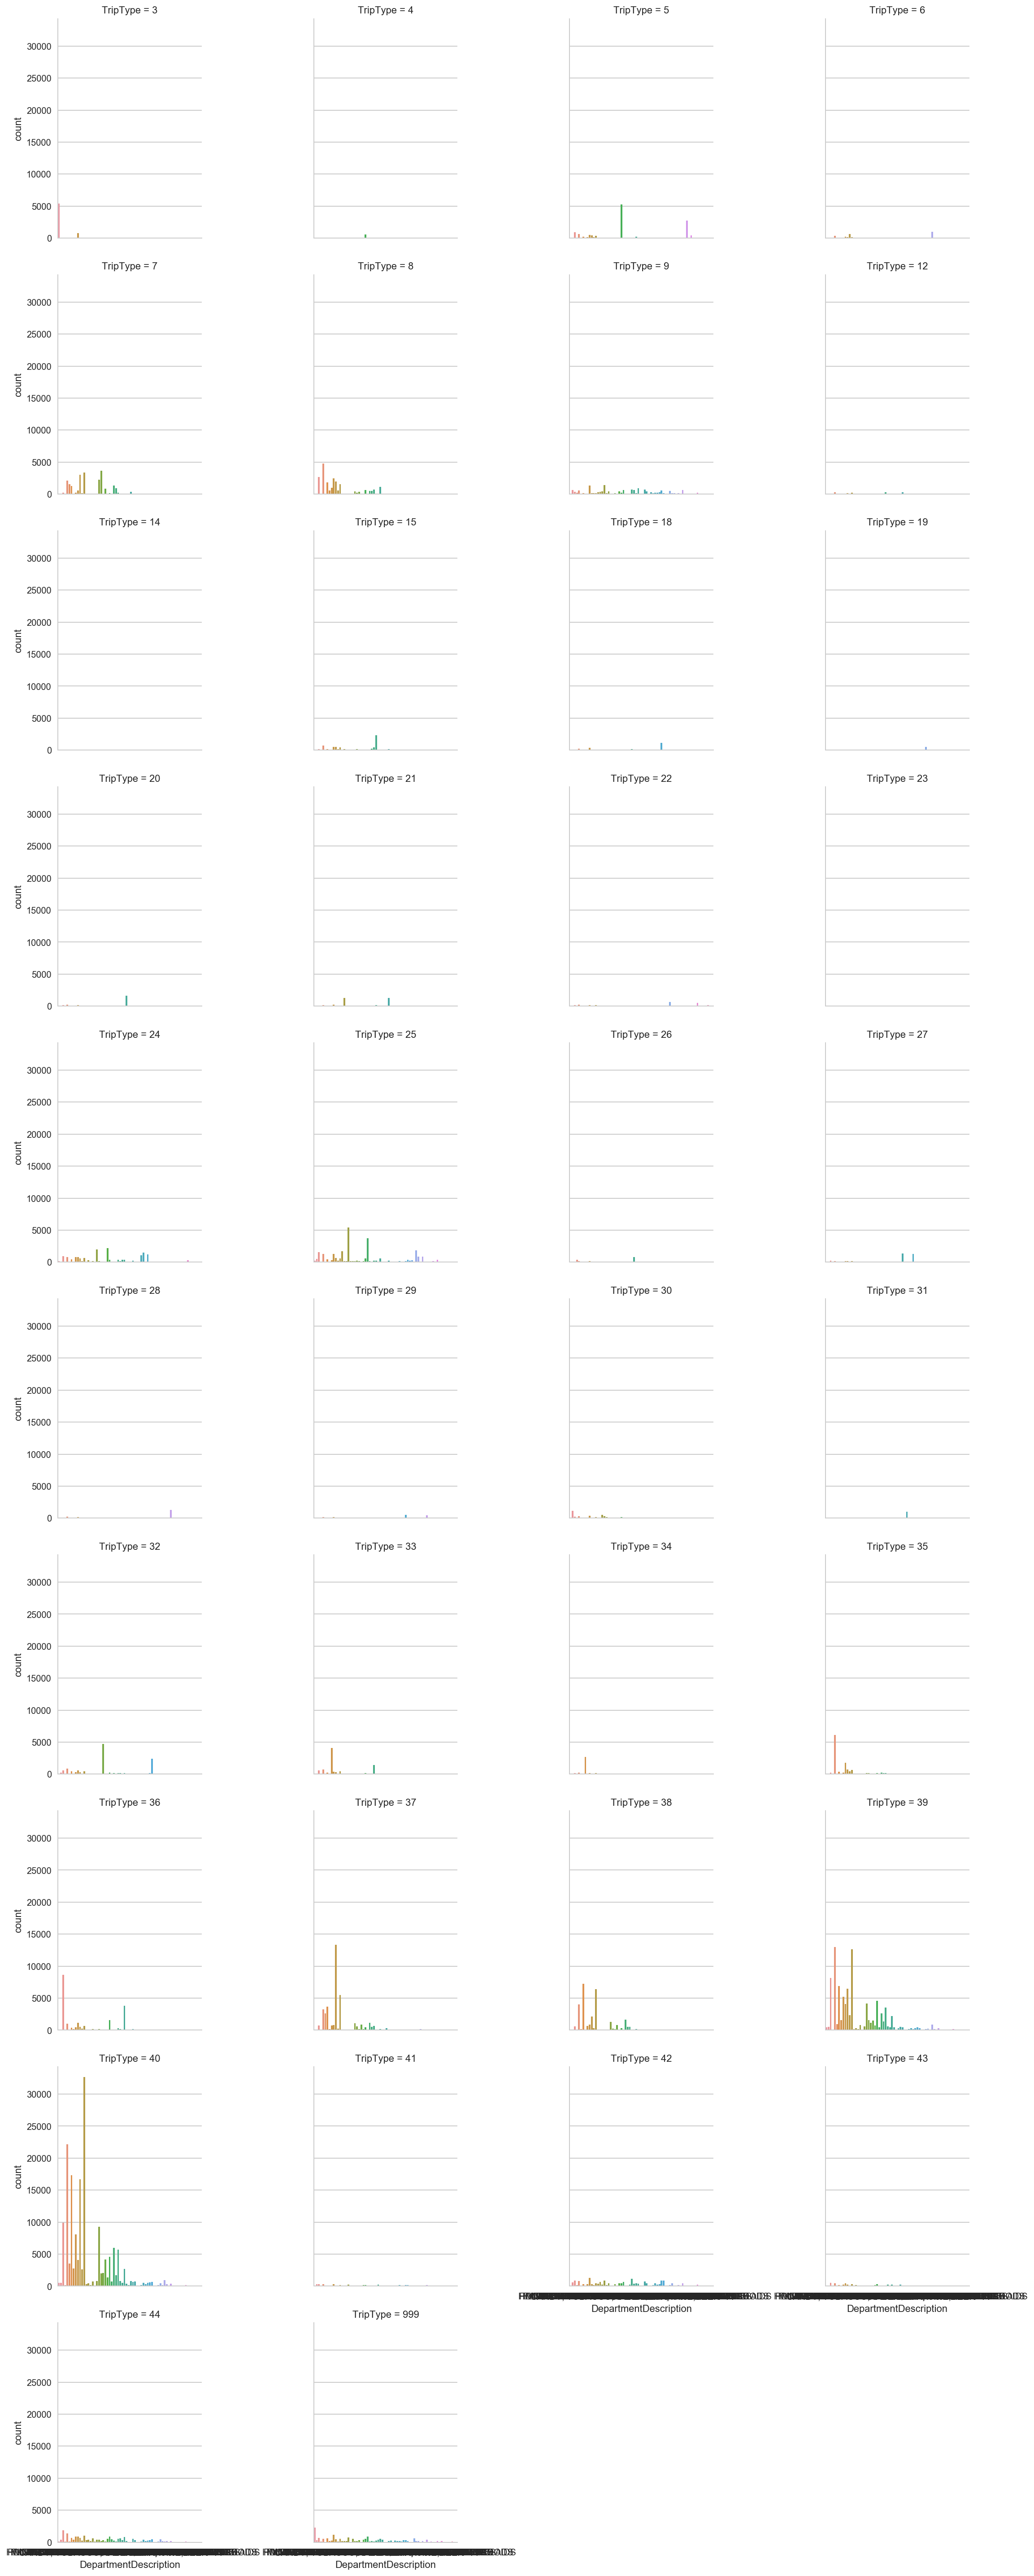

In [19]:
sns.factorplot(x="DepartmentDescription", col="TripType", col_wrap=4, data=train[train.notnull()], kind="count")

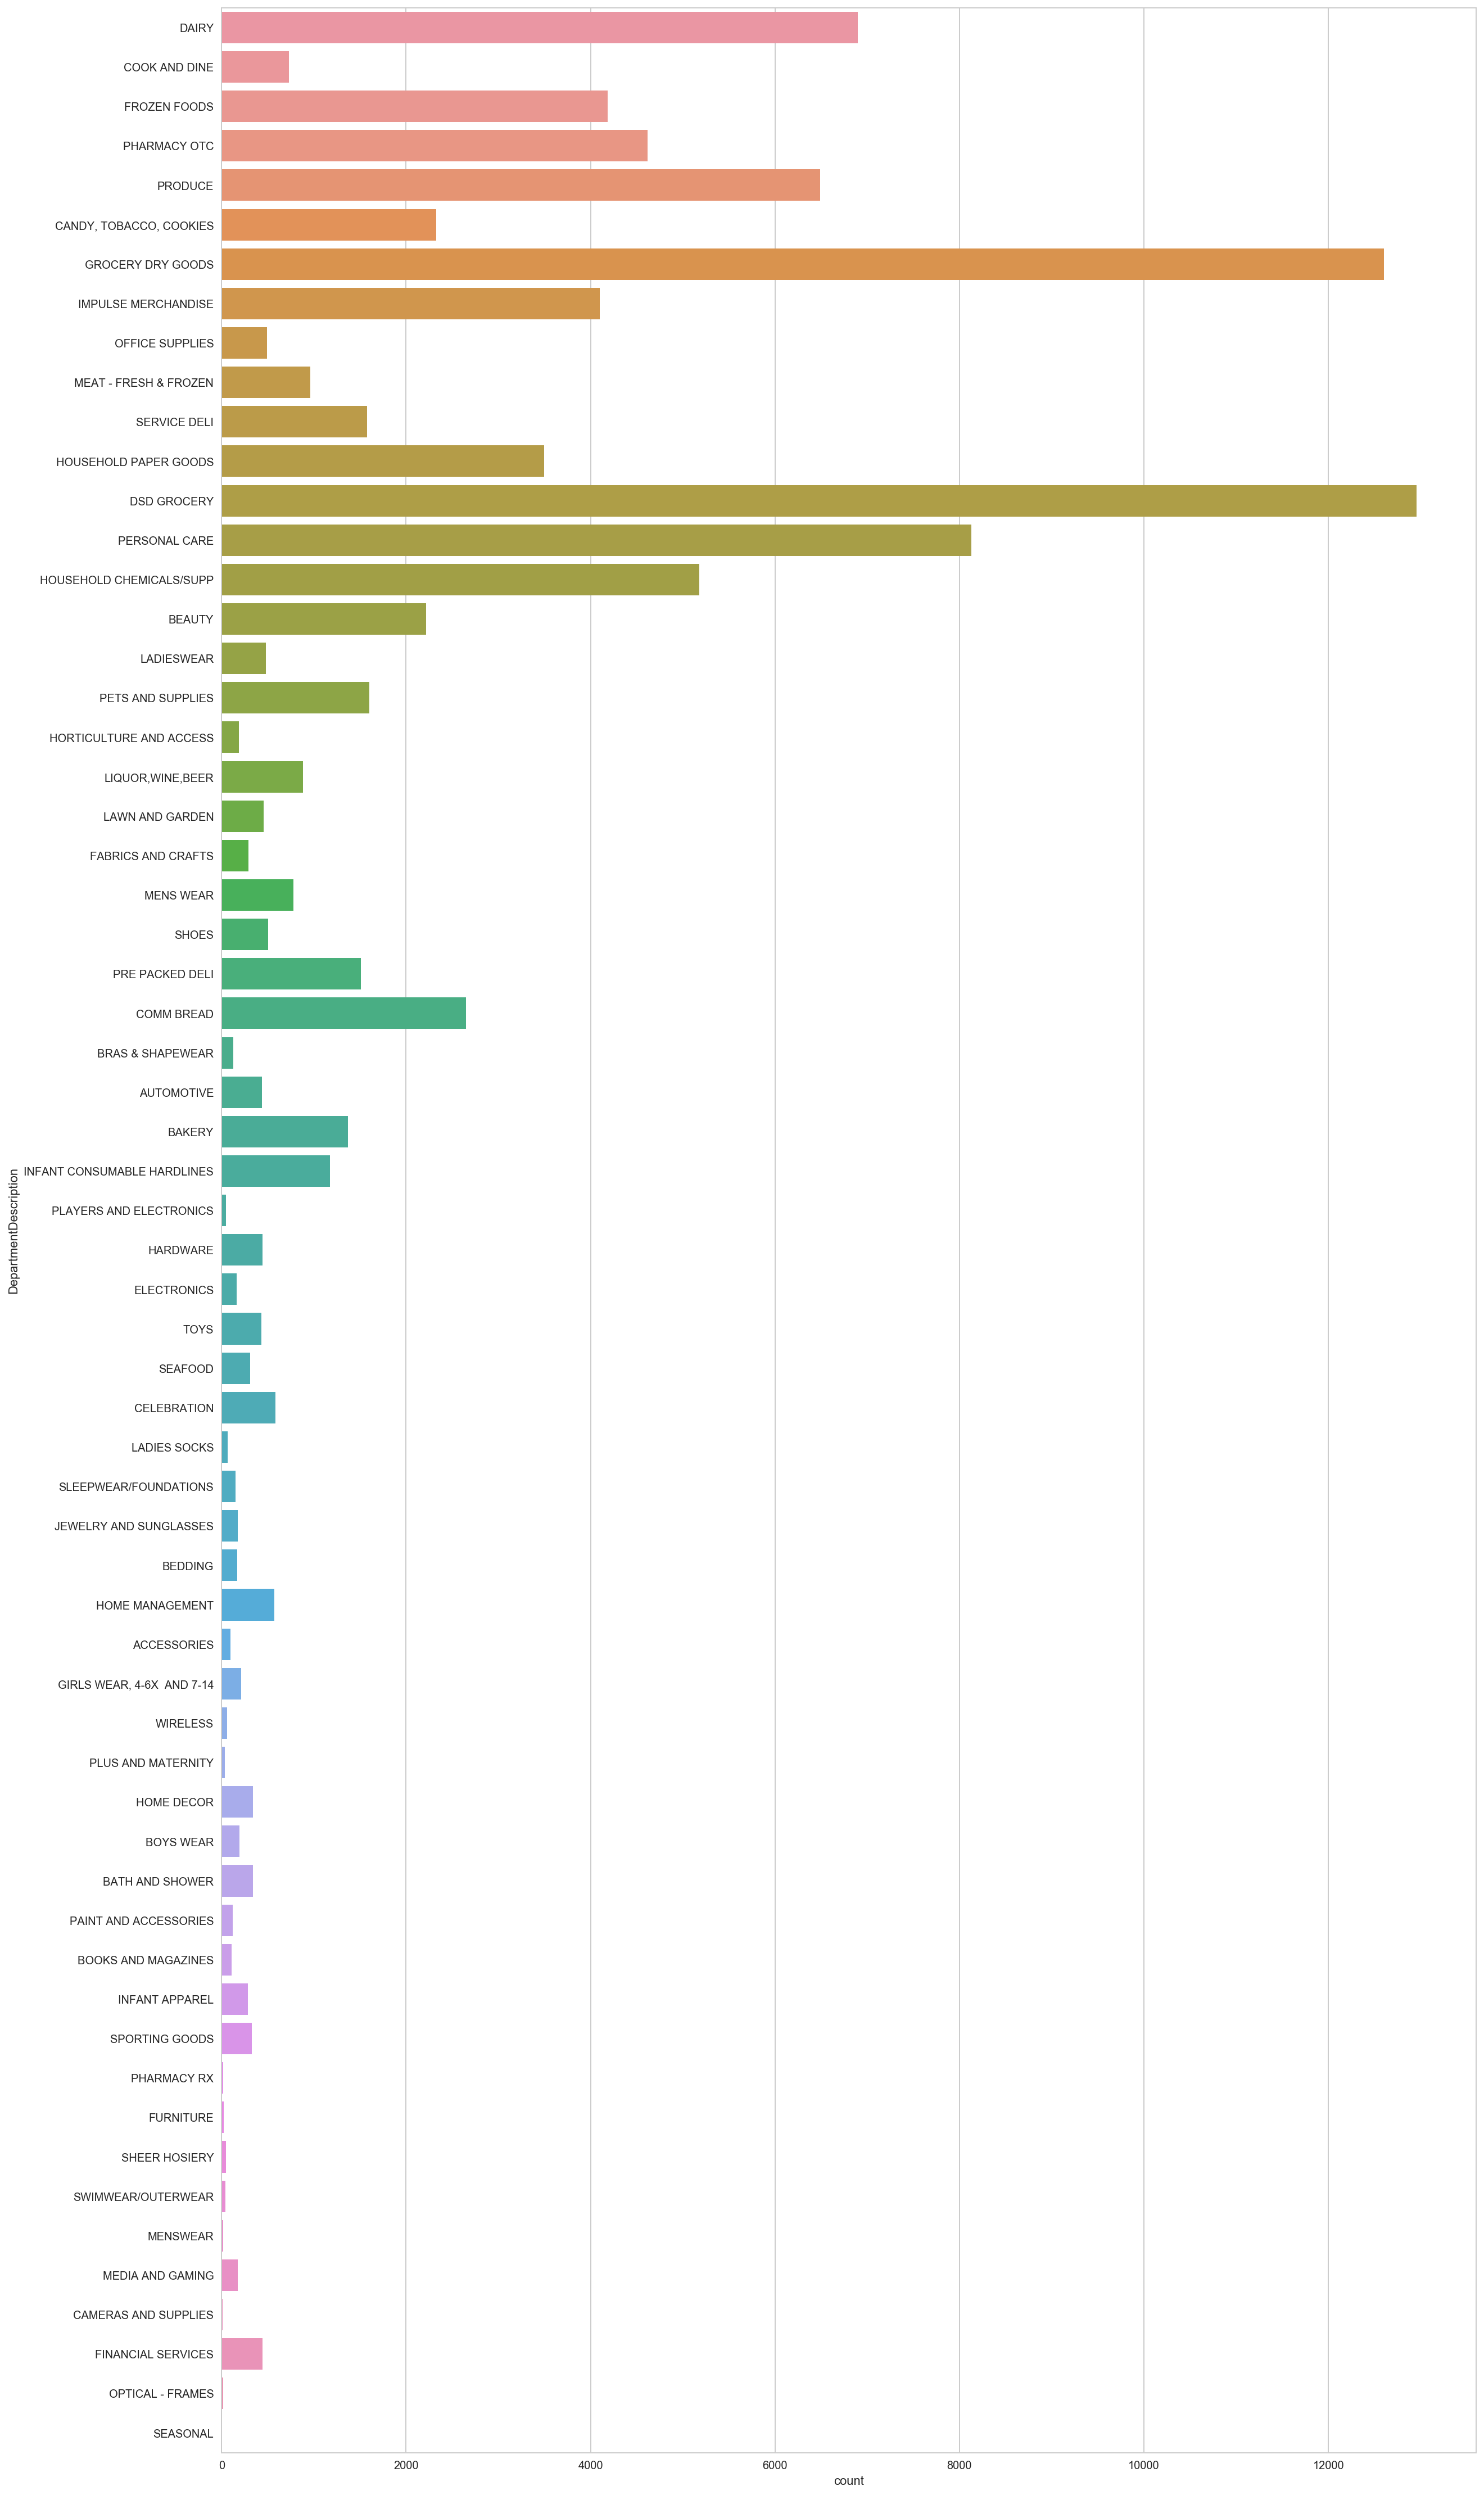

In [20]:
triptype_each = train[train['TripType'].isin([39])]
plt.figure(figsize=(20, 40))
sns.countplot(y='DepartmentDescription', data=triptype_each)
plt.show()

In [21]:
tripType = list(train['TripType'].unique())
tripType.sort()

* * * *

In [22]:
basket = train.pivot_table(values='ScanCount', columns="TripType", index="DepartmentDescription")

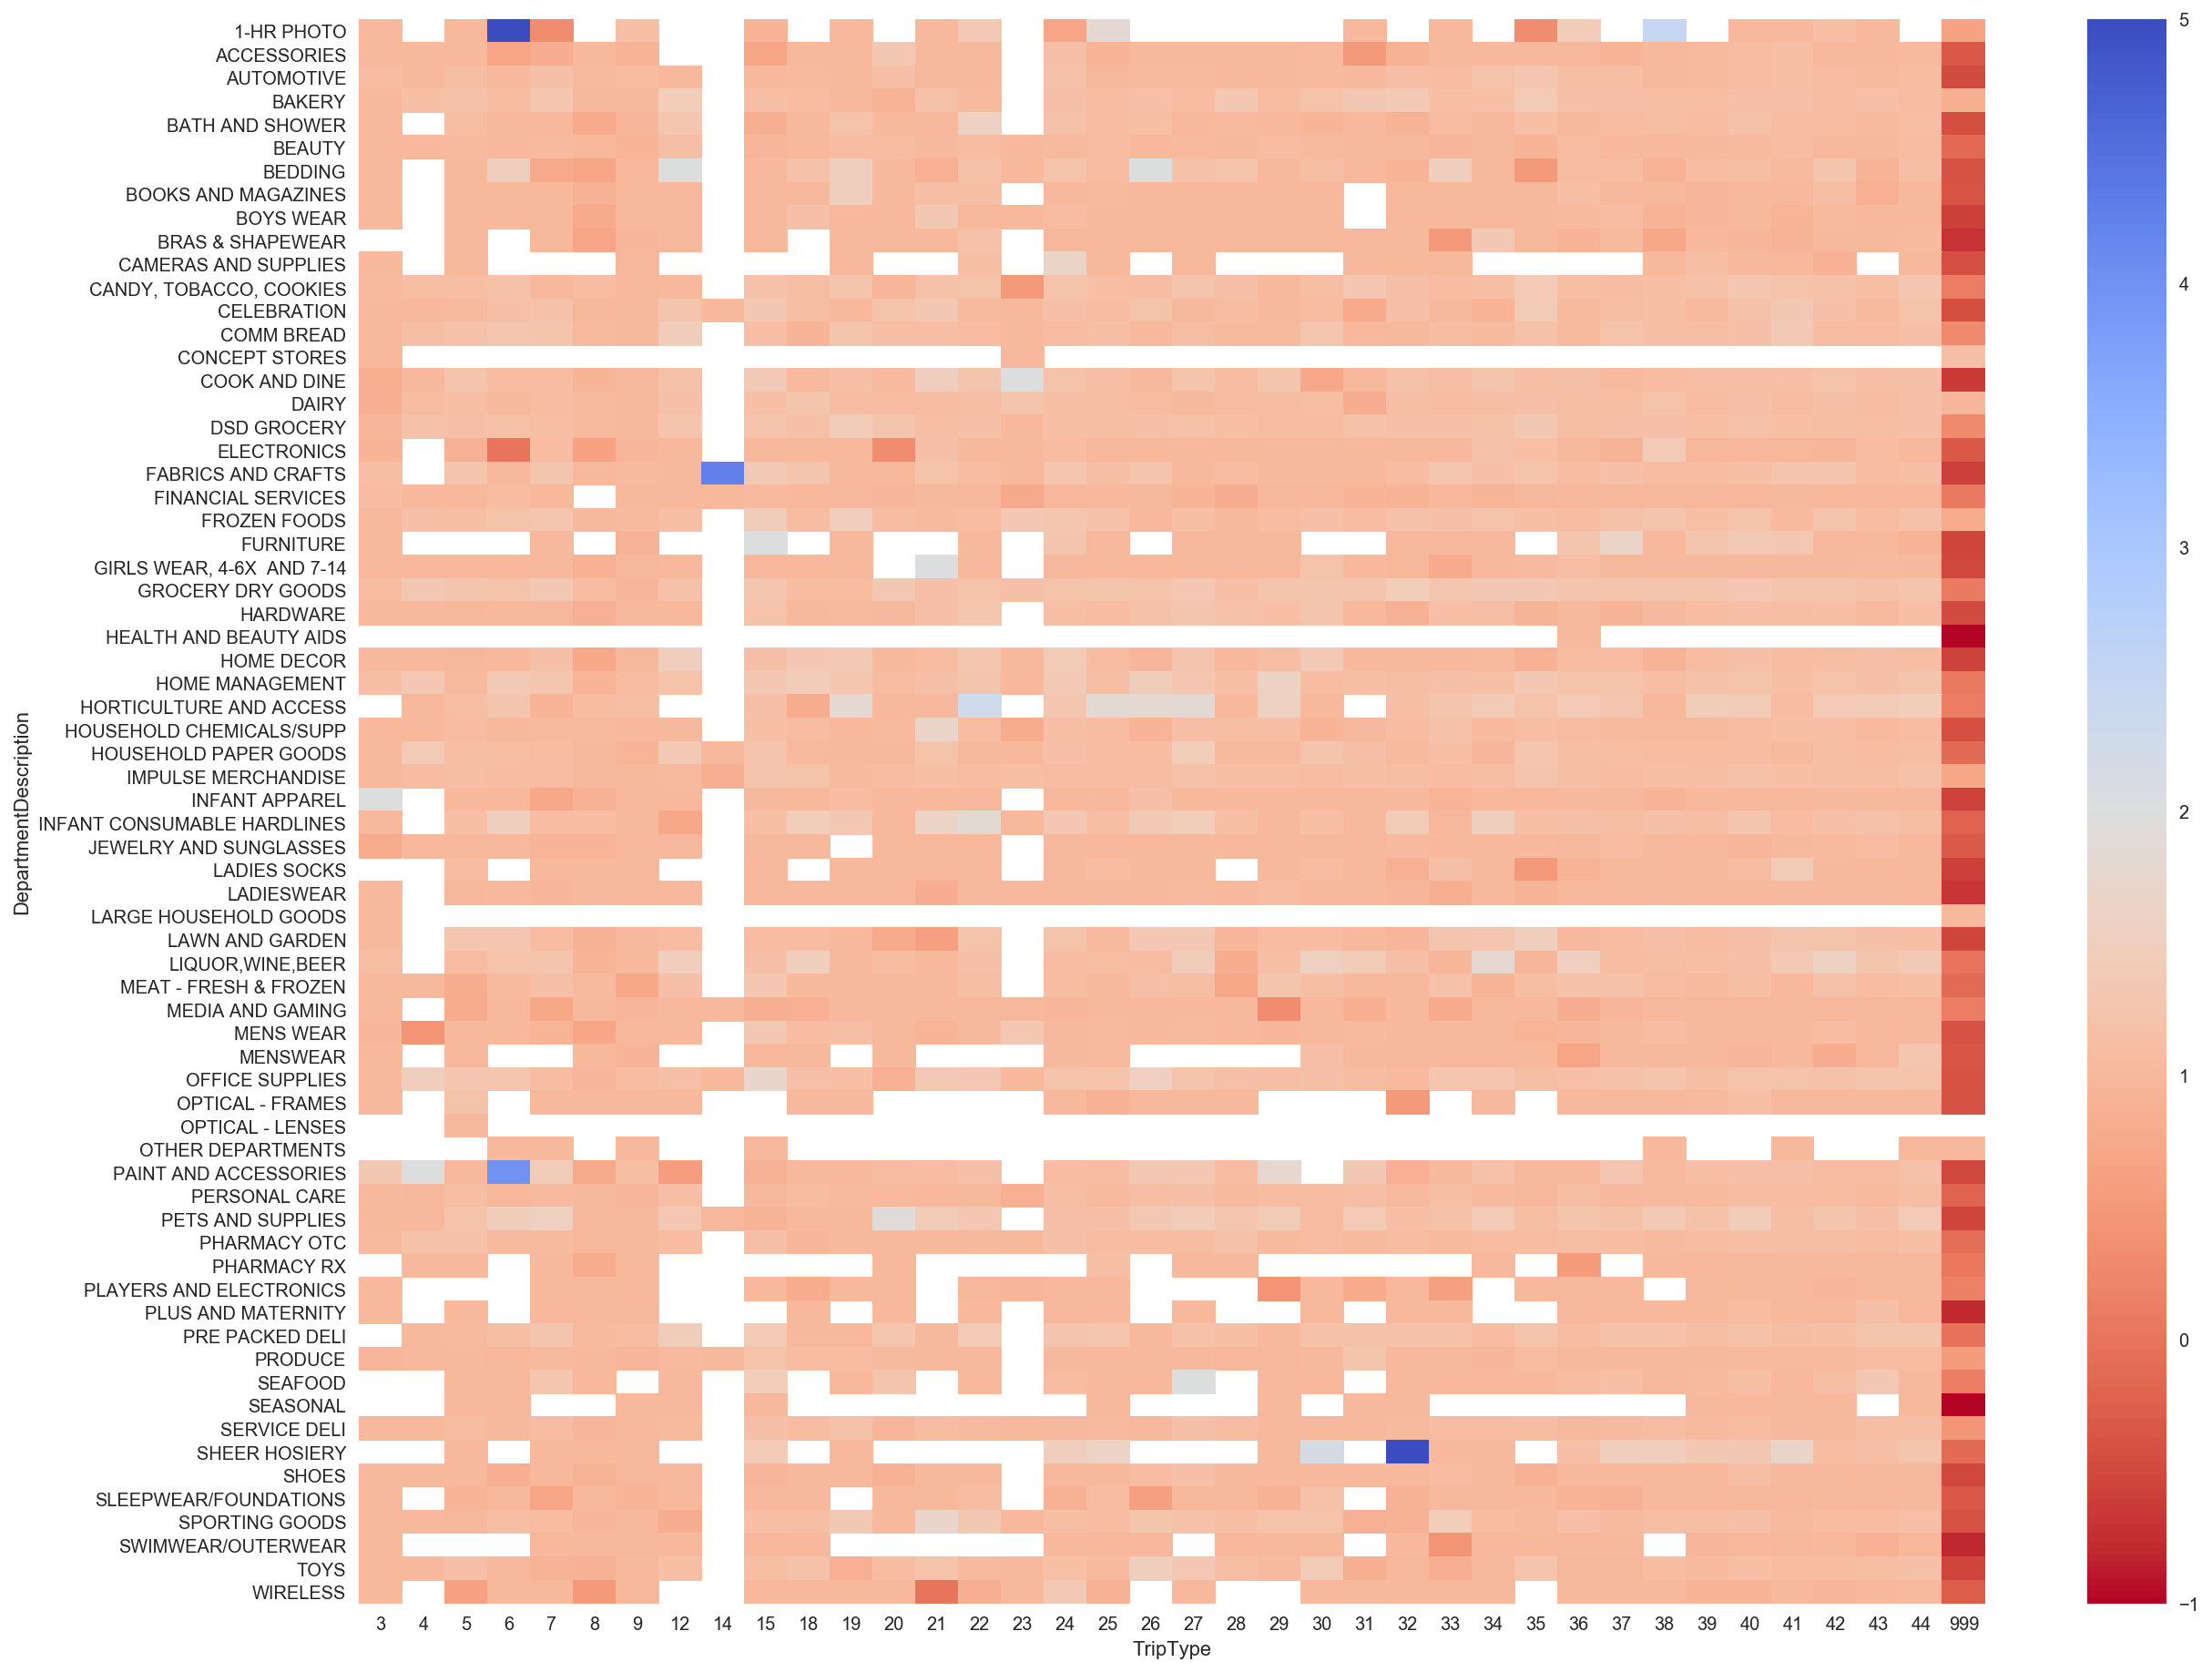

In [23]:
plt.figure(figsize=(20, 16))
sns.heatmap(basket, cmap="coolwarm_r", cbar=True)
plt.show()

연관성을 이런 식으로 추출하기는 쉽지 않다

# NaN의 분포

In [24]:
ex1 = train[(train['DepartmentDescription'].isin(['PHARMACY RX'])) & train['FinelineNumber'].notnull()]

In [25]:
ex1['FinelineNumber'].value_counts()

4822.0    84
5615.0    63
1335.0     6
1336.0     1
Name: FinelineNumber, dtype: int64

In [26]:
ex2 = train[(train['DepartmentDescription'].isin(['PHARMACY RX'])) & train['FinelineNumber'].isnull()]

In [27]:
ex2['TripType'].value_counts()

5      2570
999     105
36       22
43       18
39       13
8        10
25        6
4         4
9         3
38        3
44        3
7         2
40        2
34        2
42        1
27        1
28        1
20        1
41        1
Name: TripType, dtype: int64

In [28]:
train[(train['TripType'].isin([5])) & (train['DepartmentDescription'].isin(['PHARMACY RX']))]['FinelineNumber'].value_counts()

4822.0    81
5615.0    56
1335.0     6
1336.0     1
Name: FinelineNumber, dtype: int64

triptype 5, finelinenumber --> 4822로 채워넣는 것

In [29]:
train[(train['TripType'].isin([999])) & (train['DepartmentDescription'].isin(['PHARMACY RX']))]['FinelineNumber'].value_counts()

5615.0    4
4822.0    2
Name: FinelineNumber, dtype: int64

In [30]:
train[(train['TripType'].isin([39])) & (train['DepartmentDescription'].isin(['PHARMACY RX']))]['FinelineNumber'].value_counts()

5615.0    1
4822.0    1
Name: FinelineNumber, dtype: int64

In [31]:
ex3 = train[(train['DepartmentDescription'].notnull()) & train['FinelineNumber'].isnull()]

In [32]:
ex3['DepartmentDescription'].unique()

array(['PHARMACY RX'], dtype=object)